# PHY5001 Assessment 2
##  Grover's algorithm 

This is the Jupyter Notebook which accompanies the pdf guide for Assignment 2, which focuses on Grover's Algorithm. Be advised that you should read the pdf as well, as there are questions which you will need to answer.

### Table of Contents
This hyperlinked table of contents may help reduce how much scrolling around you need to do to find the appropriate cells

- [Task 2: Selector](#Task2_cell)
    - [(a) GateSwitch](#Task2a_cell)
    - [(b) SelectorSix](#Task2b_cell)

    
- [Task 3: Amplifier](#Task3_cell)


- [Task 4: Putting together Grover's algorithm](#Task4_cell)


- [Task 5: Comparison of classical and quantum search](#Task5_cell)
    - [(a) RandomiseSix](#Task5a_cell)
    - [(b) Plotting comparison](#Task5Plot_cell)
    
    
- [Testing Functions](#Testing)
    - [Task 2 Testing](#Task2T_cell)
    - [Task 3 Testing](#Task3T_cell)
    - [Task 4 Testing](#Task4T_cell)
    - [Task 5 Testing](#Task5T_cell)

## Housekeeping
The cells below will import the appropriate packages you need for this assignment, assuming they are installed, and apply particular configuration settings for `DumpMachine`. You will need to run these cells each time you open this file to start work, as without them your functions below will not run as intended. 

In [105]:
import qsharp
import numpy as np
import matplotlib.pyplot as plt

In [106]:
%%qsharp
open Microsoft.Quantum.Diagnostics;

In [107]:
%config dump.basisStateLabelingConvention="BitString" 
%config dump.phaseDisplayStyle="NumberOnly"

## Task 2: Selector

<a id='Task2_cell'></a>

In this task, you will write code to set up the **Selector** component of Grover's algorithm. You will need to write two functions to build this Selector:
 - A function **GateSwitch** which applies Pauli-X gates to qubits in a 6 qubit array, using a Boolean array input to configure which qubits will be modified by the Pauli-X gates
 - A function **SelectorSix** which takes a 6 qubit array input and:
   - applies GateSwitch
   - applies a controlled-Z gate to the entire array, with the 6th qubit in the array being the target
   - applies GateSwitch again


<a id='Task2a_cell'></a>
In the cell below, write your code for **GateSwitch**.

*Hint: You will likely need to include a `for` loop and an `if` condition to make this work.*

In [108]:
%%qsharp
operation GateSwitch(target: Qubit[], pattern: Bool[]) : Unit {
    // loop through each qubit and apply Puli-X gate if paterrn is true
    for i in 0..5 {
        if (pattern[i]){
            X(target[i]);
        }
    }
    
}

<a id='Task2b_cell'></a>
In the cell below, write your code for **SelectorSix**.

*Hint: Remember to use indices to indicate which qubit in the array you are referring to.*

In [109]:
%%qsharp
operation SelectorSix(target: Qubit[], pattern: Bool[]) : Unit {
    //step 1 : apply Gateswich which represent puli-X
    GateSwitch(target,pattern);
    //step 2 : apply controlled z in all qubit controlling tha last one 
    Controlled Z(target[0..4],target[5]);
    //step 3 : apply Gateswich to get the orginal state
    GateSwitch(target,pattern)
    
}

## Task 3: Amplifier

<a id='Task3_cell'></a>

In this task, you will write code to set up the **Amplifier** component of Grover's algorithm. You will need to write one function to build this Amplifier:
 - A function **AmplifySix** which applies which applies the appropriate gates to a 6 qubit array, with the target of the controlled-Z gate being the 6th qubit in the array.
 
 
In the cell below, write your code for **AmplifySix**

*Hint: Remember to use indices to indicate which qubit in the array you are referring to. In Workshops you have seen the tools needed for at least 3 different approaches to writing AmplifySix - you may find it useful to use two `for` loops for part of this, but do not have to use any*

In [110]:
%%qsharp
operation AmplifySix(target: Qubit[]) : Unit {
 // step 1 : apply hadamard and puli-x gate to each qubit 
   for i in 0..5 {
    H(target[i]);
    X(target[i]);
   }

 // step 2 : apply controlled-Z with the last qubit as the target
   Controlled Z(target[0..4],target[5]);

 // step 4 : apply hadamard and puli-x gate to each qubit 
   for i in 0..5 {
    X(target[i]);
    H(target[i]);
   }
 
}

<a id='Task4_cell'></a>
## Task 4: Putting together Grover's algorithm

In this task, you will write:
- A function **SixQGroverIteration** which will apply SelectorSix and AmplifySix as required for a single iteration of Grover's algorithm
- A function **SixQGrovers** which will apply SixQGroverIteration multiple times in a row, as determined by an input `repeats`

<a id='Task4a_cell'></a>
In the cell below, write your code for **SixQGroverIteration**.

In [111]:
%%qsharp
operation SixQGroverIteration(target: Qubit[], pattern: Bool[]) : Unit {
    // step 1: apply the selector to select the targe state 
    SelectorSix(target,pattern);
    
    // step 2 : apply the ammplifier to boost the probability of the slected state 
    AmplifySix(target);

    
        
}

In the cell below, write your code for **SixQGrovers**

*Hint: One way to approach this is to write a `for` loop which will apply **SixQGroverIteration** on each repeat*

In [112]:
%%qsharp
operation SixQGrovers(target: Qubit[], pattern: Bool[], repeats: Int) : Unit {
    
    for i in 0..repeats-1{
        SixQGroverIteration(target,pattern);
    }
       
    
}

<a id='Task5_cell'></a>
## Task 5: Comparison of classical and quantum search

Now that we have a function that performs a single iteration of Grover's algorithm, let's work towards comparing the performance of quantum search against classical search. To do so, you will need to write:
- A function **RandomiseSix**, which should use Hadamard gates on all 6 qubits in a 6 qubit input to create a completely randomised quantum superposition, in order to allow a fair test of the algorithm
- Plotting code for comparing the performance of classical and quantum search algorithms


<a id='Task5a_cell'></a>
In the cell below, write your code for **RandomiseSix**.

*Hint: Remember to use indices to indicate which qubit in the array you are referring to.*

In [113]:
%%qsharp
operation RandomiseSix(target: Qubit[]) : Unit {

    for X in 0..5 {
      H(target[X])     
    } 
    
}

The cell below contains a function which will combine your RandomiseSix with your SixQGrovers. This will allow you to simulate the action of Grover's algorithm for searching. Assuming you have checked that your functions above work correctly, this should not need any adjustments in order to run. 

In [114]:
%%qsharp
operation SixGroverRun(repeats: Int, pattern: Bool[]) : Unit {
    use q = Qubit[6];
    RandomiseSix(q);
    SixQGrovers(q, pattern, repeats);
DumpMachine();
ResetAll(q);        
}

In the cell below:
- run a single iteration (eg. repeats = 1) of SixGroverRun for any 6 qubit Boolean pattern you choose - this will be fed into the selector. 
- Make note of the probability of measuring the state you have set the selector for.

Repeat the above, increasing the number of repeats from 1 to 20 in steps of 1, recording the probability of measuring the state you have selected at each point.

*Note: You may notice that the probability changes in an unexpected manner after 6 repeats - this is not an error!*

 after apllying the it in Quirk i gort thiese results---> the selector marked the state 010111, and the amplifier boosted its probability to 13.4827%, while other states remained at 1.3733%, confirming the correct state was amplified.

In [115]:
%%qsharp

// Example: Call SixGroverRun with 2 repeats and pattern 101010:
SixGroverRun(1, [true,false,true,false,true,false])



<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250004"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.3672+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="13.482666015625009"></progress>
    <span>13.4827%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156249996"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156249996"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>

  </tbody>
</table>


In [116]:

%%qsharp

SixGroverRun(20, [true,false,true,false,true,false])




<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887249"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.27111044008872576"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887249"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.9106+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="82.92004227441045"></progress>
    <span>82.9200%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887249"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887249"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887249"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887249"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887246"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


In [117]:
%%qsharp

operation RecoredProbabilities(pattern: Bool[]) : Unit {
    // Create a mutable array to store probabilities
mutable probabilities = [0, size = 20];
    // Loop through each repeat count
    for repeats in 1..20 {
        Message($"Running Grover with {repeats} iterations:");
        
        use q = Qubit[6];
        RandomiseSix(q);
        SixQGrovers(q, pattern, repeats);

        // Dump the machine state to inspect it
        DumpMachine();

        // Reset the qubits after running
        ResetAll(q);
    }
}



In [118]:
%%qsharp
RecoredProbabilities( [true,false,true,false,true,false]);


Running Grover with 1 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250004"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.3672+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="13.482666015625009"></progress>
    <span>13.4827%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156249996"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250007"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156249996"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250016"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.1172+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.3732910156250013"></progress>
    <span>1.3733%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 2 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.5864+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="34.38951969146732"></progress>
    <span>34.3895%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.1021+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.041436195373536"></progress>
    <span>1.0414%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 3 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168646"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168653"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168646"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.7690+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="59.13801500573763"></progress>
    <span>59.1380%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168646"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168646"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168646"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168646"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168648"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0805+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.6486029364168651"></progress>
    <span>0.6486%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 4 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.291465048576356"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.291465048576356"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.291465048576356"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.291465048576356"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.291465048576356"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.291465048576356"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.291465048576356"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.291465048576356"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763563"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763563"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.9035+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="81.63770193968965"></progress>
    <span>81.6377%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763563"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763563"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763563"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763563"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.0540+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2914650485763562"></progress>
    <span>0.2915%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 5 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775999"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775999"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775999"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775999"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775999"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775999"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775999"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775999"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759376"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759646"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759376"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.9816+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="96.35154816192126"></progress>
    <span>96.3515%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759376"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775972"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759376"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775972"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.057911933937759896"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0241+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.05791193393775984"></progress>
    <span>0.0579%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 6 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668207"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668207"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668207"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668207"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668207"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668207"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668207"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668207"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668002"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668087"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668002"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.9983+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="99.65856807867996"></progress>
    <span>99.6586%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668002"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668186"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668002"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668186"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668241"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0074+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.005419554306668227"></progress>
    <span>0.0054%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 7 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1469059562329213"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1469059562329198"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1469059562329213"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.9526+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="90.74492475732615"></progress>
    <span>90.7449%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1469059562329213"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292016"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1469059562329213"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292016"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.0383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.14690595623292013"></progress>
    <span>0.1469%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 8 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924763"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.44755222049247745"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924763"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.8474+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="71.80421010897405"></progress>
    <span>71.8042%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924763"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.44755222049247745"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924763"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.44755222049247745"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0669+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4475522204924766"></progress>
    <span>0.4476%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 9 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902154"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902154"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.6892+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="47.49761562911668"></progress>
    <span>47.4976%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902154"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902154"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.0913+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8333711804902132"></progress>
    <span>0.8334%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 10 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391835"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391872"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391835"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.4879+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="23.806842303031335"></progress>
    <span>23.8068%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391835"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391835"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2094152015391861"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.1100+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.209415201539186"></progress>
    <span>1.2094%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 11 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343773"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.483142200334374"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343773"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.2562+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="6.562041378934413"></progress>
    <span>6.5620%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343773"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343773"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343742"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.1218+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4831422003343748"></progress>
    <span>1.4831%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 12 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660244"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660276"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660244"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.0084+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.007050584240359285"></progress>
    <span>0.0071%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660244"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660282"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660244"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660282"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.1260+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5871896732660267"></progress>
    <span>1.5872%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 13 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423691"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423691"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.2399+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="5.755012184830919"></progress>
    <span>5.7550%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423691"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423691"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423671"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.1223+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.4959521875423678"></progress>
    <span>1.4960%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 14 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657026"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657026"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.4732+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="22.391388755560758"></progress>
    <span>22.3914%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657026"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657026"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.2318827181657048"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.1110+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.231882718165705"></progress>
    <span>1.2319%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 15 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154499"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154499"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154499"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154499"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154499"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154499"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154499"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154499"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154515"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154499"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154515"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.6769+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="45.8220719997268"></progress>
    <span>45.8221%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154515"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.8599671111154515"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.85996711111545"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.0927+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.859967111115449"></progress>
    <span>0.8600%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 16 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.47173147281412664"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.47173147281412664"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.47173147281412664"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.47173147281412664"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.47173147281412664"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.47173147281412664"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.47173147281412664"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.47173147281412664"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141247"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141265"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141247"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.8383+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="70.28091721271018"></progress>
    <span>70.2809%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141247"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141268"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141247"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141268"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0687+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.4717314728141261"></progress>
    <span>0.4717%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 17 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1627181673749528"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1627181673749524"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1627181673749528"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.9474+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="89.74875545537813"></progress>
    <span>89.7488%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1627181673749528"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1627181673749529"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1627181673749528"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.1627181673749529"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495262"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.0403+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.16271816737495243"></progress>
    <span>0.1627%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 18 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349602"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349822"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349602"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.9972+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="99.43467341019911"></progress>
    <span>99.4347%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349602"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349687"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349602"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349687"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0095+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.008973437933349782"></progress>
    <span>0.0090%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 19 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.048332901500336374"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.048332901500336374"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.048332901500336374"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.048332901500336374"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.048332901500336374"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.048332901500336374"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.048332901500336374"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.048332901500336374"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033619"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033625"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033619"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.9847+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="96.9550272054788"></progress>
    <span>96.9550%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033619"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033639"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033619"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033639"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0220+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.04833290150033636"></progress>
    <span>0.0483%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>

  </tbody>
</table>


Running Grover with 20 iterations:

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887258"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887241"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887258"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.9106+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="82.92004227441042"></progress>
    <span>82.9200%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887258"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887243"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887258"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887243"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.0521+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.2711104400887245"></progress>
    <span>0.2711%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


<a id='Task5Plot_cell'></a>
Now for the comparison between classical and quantum search. Six qubits are capable of representing, at most, 64 ($2^{6}$) different objects simultaneously. For a fair comparison, we need to consider how many attempts it would take a classical computer to determine whether a particular item appears on a list. For a list with $N$ items, the probability $P$ of finding a particular item within $t$ attempts is:

$$P = 1 - (1 - \frac{1}{N})^t$$

In the cell below, write code which:
- builds an array `P_quant` out of the probability values you recorded above when running Grover's algorithm
- creates a linspace `t_quant` with 20 values, starting at 1 and ending at 20
- creates a linspace `t_class` with 250 values, starting at 1 and ending at 250
- calculate the classical probability `P_class` at each value of `t_class`, assuming $N = 64$ and using the equation above
- Make a figure which shows `P_class` plotted against `t_class`, and `P_quant` plotted against `t_quant` with appropriate axis labels, legend labels and title


Copy the image of the figure into your Assignment 1 document (by right-clicking on it and choosing "copy image as" or "save image as", and answer the questions in the Assignment 1 pdf which are about this plot

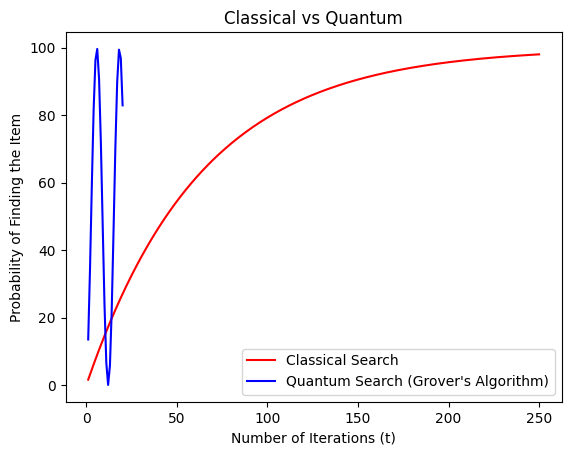

In [121]:
P_quant = [13.4827, 34.3895, 59.1380, 81.6377 ,96.3515 ,99.6586 ,90.7449 ,71.8042, 47.4976 , 23.8068, 6.5620,  0.0071, 5.7550, 22.3914,45.8221,70.2809,89.7488 ,99.4347, 96.9550, 82.9200 ]

t_class = np.linspace(1, 250, 250)


P_class = 100*(1 - (1-(1/64))**t_class)


# Plotting - Line/points

plt.plot(t_class, P_class, label="Classical Search" , color='red')
plt.plot(t_quant, P_quant, label="Quantum Search (Grover's Algorithm)", color='blue')
plt.title("Classical vs Quantum")
plt.xlabel("Number of Iterations (t)")
plt.ylabel("Probability of Finding the Item")
plt.legend()



## Testing
<a id='Testing'></a>
This section contains scripts that will allow you to check whether functions you have written above are working as intended. Note that this is not a guarantee - you should still check the code you write to be sure that it is applying logic gates in the sequence that you intend - but most common errors will be caught with these checks.

<a id='Task2T_cell'></a>
### Task 2 Testing

The cells below will allow you to test that **GateSwitch** is working as intended. You must first run the cell which builds the function **TestGateSwitch**, and then the simulation operation beneath it.

If your **GateSwitch** is working correctly, then running the function **TestGateSwitch** will produce a ``DumpMachine`` result where there is a 25% probability of measuring the states $|110101\rangle$, $|110001\rangle$, $|100101\rangle$, and $|100001\rangle$. 



In [122]:
%%qsharp
operation TestGateSwitch() : Unit {
use q = Qubit[6];
    H(q[1]);
    H(q[3]);
let testpattern = [true, true,false,true,false,true];   
GateSwitch(q,testpattern);        
DumpMachine();    
ResetAll(q);     
}

In [135]:
%%qsharp

TestGateSwitch();

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.5000+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="25.00000000000001"></progress>
    <span>25.0000%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.5000+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="25.00000000000001"></progress>
    <span>25.0000%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.5000+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="25.00000000000001"></progress>
    <span>25.0000%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.5000+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="25.00000000000001"></progress>
    <span>25.0000%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


$|\psi\rangle = \frac{1}{2}|100001\rangle+\frac{1}{2}|100101\rangle+\frac{1}{2}|110001\rangle+\frac{1}{2}|110101\rangle$

The cells below will allow you to test that **SelectorSix** is working as intended. You must first run the cell which builds the function **TestSelectorSix**, and then the simulation operation beneath it.

If your **SelectorSix** is working correctly, then running the function **TestSelectorSix** will produce a `DumpMachine` result where every state has a 1.5625% probability of being measured, and the state $|001010\rangle$ has a phase of 3.1416.

In [136]:
%%qsharp
operation TestSelectorSix() : Unit {
  use q = Qubit[6];  
    H(q[0]);
    H(q[1]);
    H(q[2]);
    H(q[3]);
    H(q[4]);
    H(q[5]);
let testpattern = [true,true,false,true,false,true];    
SelectorSix(q,testpattern);    
DumpMachine();    
ResetAll(q);    
}

In [137]:

qsharp.eval(f"TestSelectorSix()")

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>


<a id='Task3T_cell'></a>
### Task 3 Testing

The cells below will allow you to test that **AmplifySix** is working as intended. You must first run the cell which builds the function **TestAmplifySix**, and then the simulation operation beneath it.

If your **AmplifySix** is working correctly, then running the function **TestAmplifySix** will produce a `DumpMachine` result where states $|000100\rangle$ and $|100100\rangle$ have a 43.9453% chance of being measured, and a phase of 0. All other states will have a 0.1953% chance of being measured, and a phase of 3.1416.


In [138]:
%%qsharp
operation TestAmplifySix() : Unit {
use q = Qubit[6];
H(q[0]);
X(q[3]);    
Z(q[5]);
AmplifySix(q);    
DumpMachine();    
ResetAll(q);          
}

In [141]:
%%qsharp
TestAmplifySix();

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.6629+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="43.945312500000036"></progress>
    <span>43.9453%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.6629+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="43.945312500000036"></progress>
    <span>43.9453%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>

  </tbody>
</table>


<a id='Task4T_cell'></a>
### Task 4 Testing

The cells below will allow you to test that **SixQGroverIteration** is working as intended. You must first run the cell which builds the function **TestSixQGroverIteration**, and then the simulation operation beneath it.

If your **SixQGroverIteration** is working correctly, then running the function **TestSixQGroverIteration** will produce a `DumpMachine` result where states $|001000\rangle$ and $|011000\rangle$ have a 43.9453% chance of being measured, and a phase of 0. All other states will have a 0.1953% chance of being measured, and a phase of 3.1416.

In [143]:
%%qsharp
operation TestSixQGroverIteration() : Unit {
 use q = Qubit[6]; 
  let testpattern = [true,true,false,true,false,true];   
H(q[1]);
X(q[2]);    
Z(q[0]);    
SixQGroverIteration(q,testpattern);    
DumpMachine();
ResetAll(q);
    
    
}

In [146]:
#TestSixQGroverIteration.simulate()

qsharp.eval("TestSixQGroverIteration()")


<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000025"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000025"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.6629+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="43.945312500000036"></progress>
    <span>43.9453%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000025"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000025"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.6629+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="43.945312500000036"></progress>
    <span>43.9453%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000006"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(3.1416rad)">↑</td>
  <td>
    <span>3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>−0.0442+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="0.19531250000000008"></progress>
    <span>0.1953%</span>
  </td>
  <td style="transform: rotate(-3.1416rad)">↑</td>
  <td>
    <span>-3.1416</span>
  </td>
</tr>

  </tbody>
</table>


<a id='Task5T_cell'></a>
### Task 5 Testing

In [147]:
%%qsharp
operation TestRandomiseSix() : Unit {
use q = Qubit[6];
RandomiseSix(q);
DumpMachine();
ResetAll(q);
}

In [149]:
%%qsharp
TestRandomiseSix();

<table class="qs-stateTable">
  <style>
    .qs-stateTable thead tr {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
    .qs-stateTable th {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody {
      pointer-events: none;
    }
    .qs-stateTable tbody td {
      text-align: left;
      border: none;
    }
    .qs-stateTable tbody td span {
      display: inline-block;
    }
    .qs-stateTable tbody tr:nth-child(even) {
      background-color: var(
        --vscode-list-hoverBackground,
        var(--jp-layout-color1, inherit)
      );
    }
  </style>
  <thead>
    <tr>
      <th>Basis State<br />(|𝜓₁…𝜓ₙ⟩)</th>
      <th>Amplitude</th>
      <th>Measurement Probability</th>
      <th colspan="2">Phase</th>
    </tr>
  </thead>
  <tbody>
    <tr>
  <td>
    <span>|000000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|000111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|001111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|010111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|011111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|100111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|101111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|110111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111000⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111001⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111010⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111011⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111100⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111101⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111110⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>
<tr>
  <td>
    <span>|111111⟩</span>
  </td>
  <td>
    <span>0.1250+0.0000𝑖</span>
  </td>
  <td>
    <progress max="100" value="1.5625000000000007"></progress>
    <span>1.5625%</span>
  </td>
  <td style="transform: rotate(0.0000rad)">↑</td>
  <td>
    <span>0.0000</span>
  </td>
</tr>

  </tbody>
</table>
